<a href="https://colab.research.google.com/github/Rupesh0Poudel/Numerical_Introductory_Seminar/blob/main/Software_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 551 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = yf.download("SOW.DE", start = "2020-1-1", end="2022-11-30")



[*********************100%***********************]  1 of 1 completed


In [5]:
print(df.tail)

<bound method NDFrame.tail of                  Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2020-01-02  31.110001  31.450001  31.110001  31.330000  29.218414   90538
2020-01-03  31.290001  31.290001  30.730000  30.780001  28.705486  101324
2020-01-06  30.709999  30.780001  30.080000  30.780001  28.705486  209811
2020-01-07  30.850000  31.730000  30.840000  31.420000  29.302349  164562
2020-01-08  31.049999  31.889999  30.879999  31.889999  29.740671  114655
...               ...        ...        ...        ...        ...     ...
2022-11-23  25.000000  25.440001  25.000000  25.440001  25.440001   74041
2022-11-24  25.400000  26.040001  25.400000  25.959999  25.959999   55223
2022-11-25  25.820000  25.980000  25.600000  25.860001  25.860001   68366
2022-11-28  25.700001  25.719999  24.920000  24.940001  24.940001   71718
2022-11-29  24.879999  25.000000  23.879999  23.920000  23.920000   88713

[744 ro

In [6]:
df.head()
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
adj_close= df['Adj Close']
adj_close.tail()

Date
2022-11-23    25.440001
2022-11-24    25.959999
2022-11-25    25.860001
2022-11-28    24.940001
2022-11-29    23.920000
Name: Adj Close, dtype: float64

In [8]:
returns = adj_close.pct_change()

print(len(returns))
returns.head()

744


Date
2020-01-02         NaN
2020-01-03   -0.017555
2020-01-06    0.000000
2020-01-07    0.020793
2020-01-08    0.014959
Name: Adj Close, dtype: float64

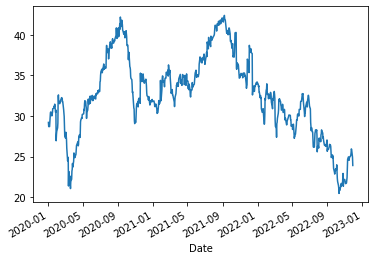

In [9]:
adj_close.plot()

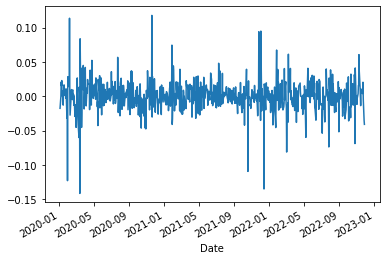

In [10]:
returns.plot()

In [11]:
returns

Date
2020-01-02         NaN
2020-01-03   -0.017555
2020-01-06    0.000000
2020-01-07    0.020793
2020-01-08    0.014959
                ...   
2022-11-23    0.010326
2022-11-24    0.020440
2022-11-25   -0.003852
2022-11-28   -0.035576
2022-11-29   -0.040898
Name: Adj Close, Length: 744, dtype: float64

In [13]:
returns
df_new = returns[1:744]
df_new

Date
2020-01-03   -0.017555
2020-01-06    0.000000
2020-01-07    0.020793
2020-01-08    0.014959
2020-01-09    0.022891
                ...   
2022-11-23    0.010326
2022-11-24    0.020440
2022-11-25   -0.003852
2022-11-28   -0.035576
2022-11-29   -0.040898
Name: Adj Close, Length: 743, dtype: float64

In [14]:
last_price = adj_close[-1]
last_price

23.920000076293945

We start with 1000 or 10000 simulation. We will try to draw the path for 252 trading days. To store the results of the simulation, pandas' dataframe was created.

In [15]:
trials = 10000
num_days = 40
simulation_df = pd.DataFrame()

For Trial = 1, the first entry of the first for loop, we start with our volatility we calculated. Our price_series for the new trial is now blank. We calculate single instance of how a price might evolve. For the second till the desired instance, we calculate, in the second for loop, all the outputs for the first trial. that completes our first trial. 
The loop goes on till the desired trial is reached, and the simulated_df now consists a matrix of all trials and price paths in each trial.   

<ipython-input-16-11572e4f5090>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = price_series


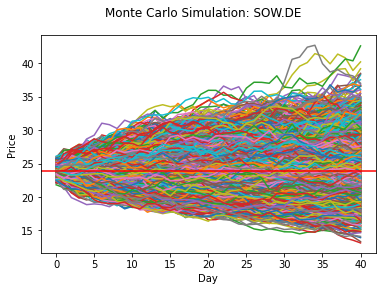

In [16]:
for x in range(trials):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 40:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series
    
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: SOW.DE')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()
# code copied from/ inspired by youtube channel "codebliss"

In [17]:
simulation_df


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,23.900895,23.555640,23.594718,24.291810,24.054551,23.613467,24.484925,23.660956,24.103733,23.995419,...,24.069158,24.086253,23.671113,23.949158,23.916067,23.649696,23.471584,23.976433,24.051919,23.966208
1,22.766306,23.283164,22.807019,23.838813,24.574670,24.035697,24.698509,24.079620,24.112989,24.615271,...,23.673165,23.672819,23.163588,23.894440,23.678598,23.401443,22.732707,24.750229,23.597248,23.723057
2,22.740476,23.681356,23.459217,23.834747,24.763552,24.426791,24.557257,24.608074,23.782836,25.026814,...,22.994922,23.539382,23.743723,24.493924,23.627706,22.969841,23.505826,24.760142,23.280577,23.296779
3,23.595187,22.697855,22.719875,23.851333,24.668624,24.997427,24.488153,24.521815,23.324814,25.122970,...,23.098922,22.908753,23.638356,23.646565,23.582233,23.848488,23.822984,24.867341,23.309031,23.366281
4,23.442271,21.701809,22.710748,23.881707,24.010235,25.192708,25.459755,24.541522,23.044756,25.531457,...,22.878000,21.603871,23.828290,23.882935,23.496764,22.930990,23.986201,24.636391,23.337808,24.092762
5,23.155257,21.141651,21.953825,23.938129,23.898979,25.101167,24.933838,24.757204,22.360091,24.744707,...,22.033268,22.058362,23.631638,25.095269,23.705812,22.205350,24.071609,24.448639,23.463503,24.803535
6,23.166173,21.051651,22.326420,25.150203,23.400629,24.247380,25.317705,24.711121,23.142329,25.103146,...,22.554684,22.783238,23.322151,25.208227,22.923216,22.124254,23.828213,24.961641,23.500044,25.023066
7,24.016426,21.510089,21.729035,24.998130,23.281194,23.234476,24.813191,23.943326,21.978010,25.567828,...,22.720246,22.225343,23.246663,24.702661,23.659437,22.328890,23.483684,24.749441,23.058045,25.409402
8,22.700677,21.417480,21.274935,25.285366,23.793655,23.493489,23.976072,25.140840,22.265216,25.611334,...,22.091114,22.129901,23.409444,24.971617,23.187698,22.034249,22.876189,25.404176,22.967627,25.506837
9,22.906841,21.111318,21.656579,25.243579,23.977469,24.144552,23.838627,25.695532,22.718414,25.925772,...,21.434915,22.843608,23.584684,25.298797,23.012985,21.948666,22.837788,26.068591,23.139286,25.115680


In [18]:
final = simulation_df.iloc[-1]
final

0       25.522879
1       22.087997
2       21.563442
3       30.006112
4       24.812056
          ...    
9995    23.595577
9996    23.540844
9997    22.240134
9998    24.050070
9999    26.145269
Name: 40, Length: 10000, dtype: float64

In [19]:
final.max()

42.577719290566364

In [20]:
final.min()

13.143331795657703

In [21]:
average = np.mean(final)

std = np.std(final)
average, std

(23.882642737697182, 3.408071697828587)

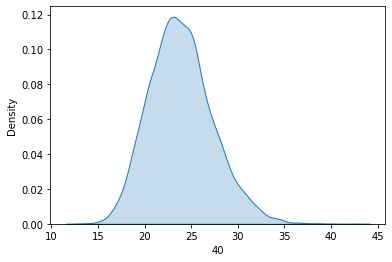

In [22]:
#kdeplot using seaborn library
sns.kdeplot(final, shade = True)


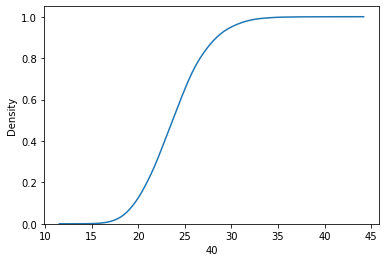

In [23]:

#for cdf instead of usual pdf, use this instead
sns.kdeplot(final, cumulative=True)

(array([0.000e+00, 0.000e+00, 0.000e+00, 2.600e+01, 1.190e+03, 4.171e+03,
        3.438e+03, 1.010e+03, 1.490e+02, 1.400e+01, 2.000e+00, 0.000e+00]),
 array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48]),
 <a list of 12 Patch objects>)

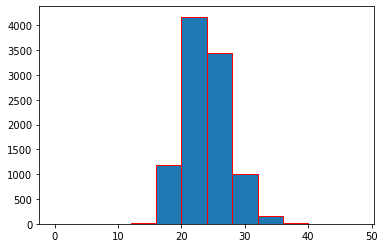

In [25]:
#bins_desired = [0,80,160,240,320,400,480,560,640,720]
bins_desired = [0,4,8,12,16,20,24,28,32,36,40,44,48]

plt.hist(final, bins = bins_desired, edgecolor = 'red')

In [26]:
counter_less140 = final[final<last_price]
counter_less140
prob = len(counter_less140) / trials 
print(prob)

0.5292


In [27]:
time_value = last_price* 1.02
print(len(final[final<time_value])/trials)

0.5842
